<a href="https://colab.research.google.com/github/graphmen/Group-Seven/blob/main/CLASS_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package

In this section, we will learn about a few important packages including

1. **Pandas**
2. Numpy
3. Scipy
4. Xarray

## Pandas

We will learn how to use pandas to:
1. open files
2. perform basic statistics
3. special functions such as dropna, isin, groupby, apply
4. Resampling and filling missing values
5. Simple plotting
6. Exporting data


Let's get our data from a Github public repository 

In [1]:
!git clone https://github.com/ogunjosam/CARNASRDA_python_training.git

%cd CARNASRDA_python_training

!dir

Cloning into 'CARNASRDA_python_training'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 44 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), 6.64 MiB | 2.66 MiB/s, done.
/content/CARNASRDA_python_training
Data_acquisition.ipynb			modelling_prediction.ipynb
Data_processing_and_manipulation.ipynb	osogbo.csv
Graphs_and_plots.ipynb			plot_graphs.ipynb
import_data.ipynb			Processing_data.ipynb
LICENSE					README.md
machine_learning.ipynb


We can use pandas to open files such as .csv, .xlsx, .sql etc

In [4]:
import pandas as pd

xx = pd.read_csv('osogbo.csv')    # csv files
#xx = pd.read_excel('osogbo.xlsx')

list(xx)  # get the list of column names


['created_at',
 'entry_id',
 'PM1.0_CF1_ug/m3',
 'PM2.5_CF1_ug/m3',
 'PM10.0_CF1_ug/m3',
 'UptimeMinutes',
 'RSSI_dbm',
 'Temperature_F',
 'Humidity_%',
 'PM2.5_ATM_ug/m3',
 'Unnamed: 10']

We can set some parameters when importing

We can:

*   import only specific columns
*   set our index parameter



In [6]:
xx = pd.read_csv('osogbo.csv',index_col='created_at',usecols=['created_at','PM1.0_CF1_ug/m3','PM2.5_CF1_ug/m3',
                                                                'PM10.0_CF1_ug/m3','Temperature_F','Humidity_%'])




,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%
created_at,,,,,
2021-01-01 00:01:14 UTC,48.24,72.73,83.95,78.0,59.0
2021-01-01 00:03:14 UTC,48.18,72.32,81.34,78.0,59.0
2021-01-01 00:05:14 UTC,48.95,74.23,83.46,78.0,59.0
2021-01-01 00:07:14 UTC,47.47,73.09,82.78,78.0,59.0
2021-01-01 00:09:14 UTC,48.09,72.57,82.44,78.0,58.0
...,...,...,...,...,...
2021-12-31 23:50:51 UTC,52.54,70.86,88.53,82.0,55.0
2021-12-31 23:52:51 UTC,53.40,72.86,90.23,82.0,55.0
2021-12-31 23:54:51 UTC,51.96,70.60,87.96,82.0,55.0


In [7]:
# To get the best out of pandas dataframes with time, the index must be in datetime format.  
#This is done with the line below

xx.index = pd.DatetimeIndex(xx.index)
xx

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%
created_at,,,,,
2021-01-01 00:01:14+00:00,48.24,72.73,83.95,78.0,59.0
2021-01-01 00:03:14+00:00,48.18,72.32,81.34,78.0,59.0
2021-01-01 00:05:14+00:00,48.95,74.23,83.46,78.0,59.0
2021-01-01 00:07:14+00:00,47.47,73.09,82.78,78.0,59.0
2021-01-01 00:09:14+00:00,48.09,72.57,82.44,78.0,58.0
...,...,...,...,...,...
2021-12-31 23:50:51+00:00,52.54,70.86,88.53,82.0,55.0
2021-12-31 23:52:51+00:00,53.40,72.86,90.23,82.0,55.0
2021-12-31 23:54:51+00:00,51.96,70.60,87.96,82.0,55.0


In [8]:
# We can create new columns dynamically

xx['Month'] = xx.index.month
xx['Day'] = xx.index.day
xx

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%,Month,Day
created_at,,,,,,,
2021-01-01 00:01:14+00:00,48.24,72.73,83.95,78.0,59.0,1,1
2021-01-01 00:03:14+00:00,48.18,72.32,81.34,78.0,59.0,1,1
2021-01-01 00:05:14+00:00,48.95,74.23,83.46,78.0,59.0,1,1
2021-01-01 00:07:14+00:00,47.47,73.09,82.78,78.0,59.0,1,1
2021-01-01 00:09:14+00:00,48.09,72.57,82.44,78.0,58.0,1,1
...,...,...,...,...,...,...,...
2021-12-31 23:50:51+00:00,52.54,70.86,88.53,82.0,55.0,12,31
2021-12-31 23:52:51+00:00,53.40,72.86,90.23,82.0,55.0,12,31
2021-12-31 23:54:51+00:00,51.96,70.60,87.96,82.0,55.0,12,31


In [13]:
# Basic statistics can also be performed smoothly

# Get summary statistics for each column
xx.describe()

xx.mean()
xx.mad()
xx.median()
xx.mode()
xx.skew()
xx.kurtosis()


,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%,Month,Day
0,5000.0,5000.0,5000.0,80.0,68.0,7,5


In [14]:
# we can do monthly or daily averages 

xx.groupby('Month').mean()
xx.groupby('Day').mean()

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%,Day
Month,,,,,,
1,52.276437,79.875940,93.853704,88.454873,45.405447,16.120890
2,51.066424,76.923989,99.504646,90.912020,40.089122,15.005654
3,1114.960584,1127.326829,1142.863275,89.872522,50.730837,16.528084
4,18.236530,26.182053,36.005899,88.762257,52.916646,15.460072
5,14.353305,19.507145,24.503743,87.135596,58.083199,15.293521
6,12.505217,17.808545,22.558042,84.671753,59.938236,14.885949
7,18.694229,27.002339,35.139857,82.984570,61.146678,15.828791
8,17.239346,25.230213,32.308245,82.915704,63.646692,15.933271
9,8.881190,12.896085,16.461239,84.886832,60.433289,15.061173


In [ ]:
# It is possible to select based on certain conditions

tt = xx[xx['Month'].isin([4,5,6,7])]
tt

In [15]:
# Can we do something like a classification for good and bad air quality?

xx.loc[xx['PM2.5_CF1_ug/m3']<50,'Quality'] = 'Good'
xx.loc[xx['PM2.5_CF1_ug/m3'].between(51,100),'Quality'] = 'Moderate'
xx.loc[xx['PM2.5_CF1_ug/m3'].between(101,150),'Quality'] = 'Sensitive'
xx.loc[xx['PM2.5_CF1_ug/m3'].between(151,200),'Quality'] = 'Highly sensitive'
xx.loc[xx['PM2.5_CF1_ug/m3'].between(201,300),'Quality'] = 'Dangerous'
xx.loc[xx['PM2.5_CF1_ug/m3']>300,'Quality'] = 'Terrible'
xx

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%,Month,Day,Quality
created_at,,,,,,,,
2021-01-01 00:01:14+00:00,48.24,72.73,83.95,78.0,59.0,1,1,Moderate
2021-01-01 00:03:14+00:00,48.18,72.32,81.34,78.0,59.0,1,1,Moderate
2021-01-01 00:05:14+00:00,48.95,74.23,83.46,78.0,59.0,1,1,Moderate
2021-01-01 00:07:14+00:00,47.47,73.09,82.78,78.0,59.0,1,1,Moderate
2021-01-01 00:09:14+00:00,48.09,72.57,82.44,78.0,58.0,1,1,Moderate
...,...,...,...,...,...,...,...,...
2021-12-31 23:50:51+00:00,52.54,70.86,88.53,82.0,55.0,12,31,Moderate
2021-12-31 23:52:51+00:00,53.40,72.86,90.23,82.0,55.0,12,31,Moderate
2021-12-31 23:54:51+00:00,51.96,70.60,87.96,82.0,55.0,12,31,Moderate


In [16]:
# Yes, pandas can change from 2 minutes data to any frequency

xx.resample('D').mean()

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%,Month,Day
created_at,,,,,,,
2021-01-01 00:00:00+00:00,43.470597,66.961597,79.252986,89.080556,47.704167,1.0,1.0
2021-01-02 00:00:00+00:00,34.564958,53.137847,63.070819,88.726389,53.211111,1.0,2.0
2021-01-03 00:00:00+00:00,33.875556,51.126528,58.375014,89.544444,52.298611,1.0,3.0
2021-01-04 00:00:00+00:00,34.828665,51.290097,57.031210,90.831711,47.570236,1.0,4.0
2021-01-05 00:00:00+00:00,30.800893,45.555886,50.223780,88.574616,49.832636,1.0,5.0
...,...,...,...,...,...,...,...
2021-12-27 00:00:00+00:00,36.833190,52.920905,73.185816,91.974777,42.179525,12.0,27.0
2021-12-28 00:00:00+00:00,43.454461,63.002335,86.024356,91.384731,44.396707,12.0,28.0
2021-12-29 00:00:00+00:00,43.473314,61.035935,80.863535,87.516937,48.265096,12.0,29.0


In [17]:
# Missing values are a nightmare.  Fortunately, we can use pandas to fill them

xx.interpolate(method='spline',order=4)

# you can get all the available methods here 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%,Month,Day,Quality
created_at,,,,,,,,
2021-01-01 00:01:14+00:00,48.24,72.73,83.95,78.0,59.0,1,1,Moderate
2021-01-01 00:03:14+00:00,48.18,72.32,81.34,78.0,59.0,1,1,Moderate
2021-01-01 00:05:14+00:00,48.95,74.23,83.46,78.0,59.0,1,1,Moderate
2021-01-01 00:07:14+00:00,47.47,73.09,82.78,78.0,59.0,1,1,Moderate
2021-01-01 00:09:14+00:00,48.09,72.57,82.44,78.0,58.0,1,1,Moderate
...,...,...,...,...,...,...,...,...
2021-12-31 23:50:51+00:00,52.54,70.86,88.53,82.0,55.0,12,31,Moderate
2021-12-31 23:52:51+00:00,53.40,72.86,90.23,82.0,55.0,12,31,Moderate
2021-12-31 23:54:51+00:00,51.96,70.60,87.96,82.0,55.0,12,31,Moderate


In [21]:
# Let's convert our temperature from Fahreheit to Celcius

# Method 1:
xx['Temperature_F'] = (xx['Temperature_F'] - 32)/1.8
xx

xx = pd.read_csv('osogbo.csv',index_col='created_at',usecols=['created_at','PM1.0_CF1_ug/m3','PM2.5_CF1_ug/m3',
                                                                'PM10.0_CF1_ug/m3','Temperature_F','Humidity_%'])
# method 2:
def f_to_c(v):
  return (v-32)/1.8


xx['Temperature_F'].apply(f_to_c)

# Method 3
xx = pd.read_csv('osogbo.csv',index_col='created_at',usecols=['created_at','PM1.0_CF1_ug/m3','PM2.5_CF1_ug/m3',
                                                                'PM10.0_CF1_ug/m3','Temperature_F','Humidity_%'])

xx['Temperature_F'] = xx['Temperature_F'].apply(lambda a : (a-32)/1.8)

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%
created_at,,,,,
2021-01-01 00:01:14 UTC,48.24,72.73,83.95,25.555556,59.0
2021-01-01 00:03:14 UTC,48.18,72.32,81.34,25.555556,59.0
2021-01-01 00:05:14 UTC,48.95,74.23,83.46,25.555556,59.0
2021-01-01 00:07:14 UTC,47.47,73.09,82.78,25.555556,59.0
2021-01-01 00:09:14 UTC,48.09,72.57,82.44,25.555556,58.0
...,...,...,...,...,...
2021-12-31 23:50:51 UTC,52.54,70.86,88.53,27.777778,55.0
2021-12-31 23:52:51 UTC,53.40,72.86,90.23,27.777778,55.0
2021-12-31 23:54:51 UTC,51.96,70.60,87.96,27.777778,55.0


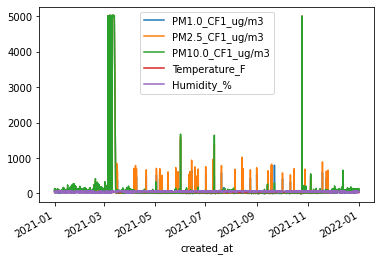

In [25]:
# some simple plotting
xx.plot()  # this plots all the column in one plot
xx.index = pd.DatetimeIndex(xx.index)
xx = xx.resample('D').mean()

array([<Axes: xlabel='created_at'>, <Axes: xlabel='created_at'>,
       <Axes: xlabel='created_at'>, <Axes: xlabel='created_at'>,
       <Axes: xlabel='created_at'>], dtype=object)

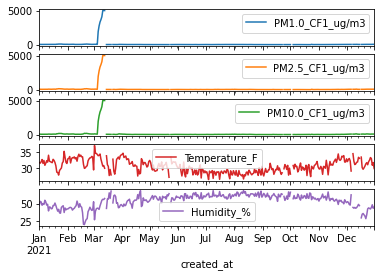

In [26]:
xx.plot(subplots=True)

array([<Axes: xlabel='created_at'>, <Axes: xlabel='created_at'>,
       <Axes: xlabel='created_at'>, <Axes: xlabel='created_at'>,
       <Axes: xlabel='created_at'>], dtype=object)

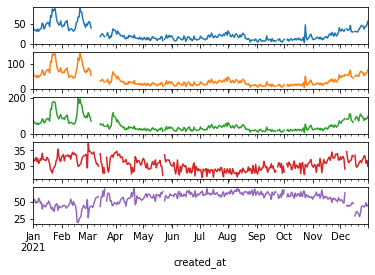

In [27]:
# some of the particulate matter have unusually high values.  We can replace them
import numpy as np

xx['PM1.0_CF1_ug/m3'][xx['PM1.0_CF1_ug/m3'] > 300] = np.nan 
xx['PM2.5_CF1_ug/m3'][xx['PM2.5_CF1_ug/m3'] > 300] = np.nan 
xx['PM10.0_CF1_ug/m3'][xx['PM10.0_CF1_ug/m3'] > 300] = np.nan 

# then plot again
xx.plot(subplots=True,legend=None)

In [ ]:
# lastly, after manipulation, we can export our dataframe to other formats including excel

xx.to_numpy()